In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../')
from python_code import model
os.chdir('notebooks')
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../data/cheese.csv')

In [3]:
group = df.groupby('store')
stores = list(group.groups.keys())

In [4]:
X_stores = []
y_stores = []
for store in stores:
    df_store = group.get_group(store)
    X = np.ones([df_store.shape[0], 4])
    X[:, 1] = np.log(df_store['price'])
    X[:, 2] = df_store['disp'] 
    X[:, 3] = df_store['disp'] * np.log(df_store['price'])
    y = np.log(df_store['vol']).to_numpy()
    X_stores.append(X)
    y_stores.append(y)

In [5]:
len(y_stores)

88

In [6]:
mod = model.Model(X_stores, y_stores, df.shape[0])
mod.fit()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.62it/s]


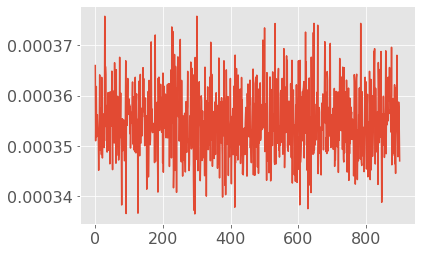

In [12]:
plt.plot(mod.traces['sigma_squared']);


In [8]:
mod.betas

array([[ 7.71962258e+00,  9.17203469e+00,  5.24903882e+00,
         9.50968899e+00,  9.95851151e+00,  9.80506399e+00,
         4.58819831e+00,  7.76479071e+00,  6.70477932e+00,
         4.98388163e+00,  9.89046073e+00,  1.00666641e+01,
         8.12739893e+00,  8.21730250e+00,  3.92416890e+00,
         8.05286356e+00,  6.42206398e+00,  6.51663485e+00,
         8.92192977e+00,  9.62025296e+00,  8.49176261e+00,
         7.89609069e+00,  8.03986440e+00,  9.15310393e+00,
         8.64245765e+00,  9.68583373e+00,  8.51320702e+00,
         9.69713176e+00,  5.98412502e+00,  7.31697293e+00,
         8.06268141e+00,  9.63649539e+00,  6.21167772e+00,
         1.14452705e+01,  7.48325899e+00,  9.43879546e+00,
         6.39076299e+00,  3.61296605e+00,  7.90314870e+00,
         8.34058929e+00,  7.71485160e+00,  5.79836405e+00,
         5.51467662e+00,  1.10508492e+01,  7.62593555e+00,
         6.39510361e+00,  4.97715075e+00,  5.51442797e+00,
         6.65454204e+00,  6.67008355e+00,  8.55012806e+0

In [9]:
mod.traces['gamma']

array([[-3.15672328e-05,  1.21305965e-04,  1.52885934e-04,
         1.25425729e-05],
       [ 2.40654648e-04,  9.44901068e-05,  1.69058312e-04,
        -8.42879776e-06],
       [ 3.42235352e-04,  4.38637892e-04, -7.40473453e-05,
         6.93179835e-06],
       ...,
       [ 2.23976931e-04, -6.37982853e-07,  6.55394563e-05,
        -3.73936243e-07],
       [ 6.98733539e-05,  2.39001601e-04,  9.25421767e-05,
        -8.95010127e-05],
       [-1.02385933e-04,  2.35669700e-04, -9.00458162e-05,
         2.31785274e-04]])